<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100"/>

<div>
    <font color=#690027 markdown="1"> 
        <h1>ZEENIVEAU IN OOSTENDE - LINEAIRE REGRESSIE</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook voorspel je het toekomstig zeeniveau in Oostende door toepassing van <em>lineaire regressie</em>.<br>
Je maakt gebruik van de functionaliteiten van de Python-module <em>SciPy</em>. 
</div>

<div class="alert alert-box alert-warning">
Deze notebook volgt op de notebook 'Zeeniveau in Oostende'.
</div>

<div class="alert alert-box alert-warning">
In de notebook 'Lineaire Regressie' wordt uitgelegd hoe je met de module SciPy een regressielijn bepaalt bij gegeven data.
</div>

Het zeeniveau wordt beïnvloed door o.a. stijging van het volume van de watermassa bij een stijgende temperatuur, afsmeltende ijskappen en gletsjers, veranderende opslag van oppervlaktewater en grondwater. De globale klimaatverandering leidt nog deze eeuw tot een stijging van het zeeniveau met 18 tot 59 cm [1].<br>

**We bekijken de evolutie van het zeeniveau aan de Belgische kust sinds 1951. Oostende is het meetpunt aan onze kust met de langste ononderbroken meetreeks.** 

De hoogte van een punt wordt gemeten ten opzichte van de zeespiegel. <br>De zeespiegel staat echter niet altijd op dezelfde hoogte. Eb en vloed zorgen voor een verschil dat aan de Belgische kust ongeveer vier meter bedraagt. <br>Men heeft dus een referentiepunt nodig. Het gemiddelde zeeniveau bij eb in Oostende wordt gebruikt als nulpeil: de Tweede Algemene Waterpassing (TAW). In Nederland heeft men de gemiddelde zeespiegel tussen eb en vloed genomen: het Normaal Amsterdams Peil (NAP). Het TAW-referentiepunt ligt 2,33 meter onder het NAP-referentiepunt. Om nationale hoogtemetingen met elkaar te vergelijken, moet men rekening houden met de verschillende referentiepunten [2].<br><br>
**Het zeeniveau wordt uitgedrukt in mm RLR (Revised Local Reference); data t.o.v. de lokale referentie worden omgezet naar data t.o.v. het internationaal referentieniveau.**

Het zeeniveau in Oostende wordt opgemeten sinds 1951. De waarden van deze metingen zijn terug te vinden op de website van de Vlaamse Milieumaatschappij [3]. <br><br>
Voor deze notebook zijn de data beschikbaar in het bestand `zeeniveau.csv` in de map `data`. <br>De data bevatten telkens het jaargemiddeld zeeniveau (in mm RLR) in Oostende voor een bepaald jaar en het jaartal.

### Opdracht
- Visualiseer de data uit het csv-bestand (zie ook de vorige notebook).<br>Stel het bereik van de asen zo in dat er ruimte is voor een 'blik op de toekomst'. 
- Het spreidingsdiagram vertoont een trend. Moest je deze trend weergeven met een rechte, hoe kan je de samenhang tussen x en y dan verwoorden?
- Bepaal de vergelijking van een rechte als trendlijn. 
- Teken ze erbij op de grafiek.
- Op https://www.milieurapport.be te lezen: "Statistische analyse van de eigenlijke meetwaarden aan de Belgische kust laat zien dat het jaargemiddelde zeeniveau in 2017 significant hoger ligt dan bij het begin van de meetreeks enkele decennia geleden:
in Oostende steeg de trendlijn van het zeeniveau met 129 mm tussen 1951 en 2017". <br>
Kont dit overeen met de trendlijn die je zelf vond?
- Het jaargemiddeld zeeniveau gemeten in 2018 en 2019 bedraagt resp. 7067 en 7129 mm RLR [4}. 
- Welk jaargemiddeld zeeniveau voorspelt de trendlijn voor 2030?

   ## Voorbeeldoplossing

### Nodige modules importeren

In [1]:
# voorbeeldscript
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

<div>
    <font color=#690027 markdown="1"> 
        <h2>1. Inlezen van de data</h2> 
    </font>
</div>

Het zeeniveau in Oostende wordt opgemeten sinds 1951. De waarden van deze metingen zijn terug te vinden op de website van de Vlaamse Milieumaatschappij [3].

In [2]:
# voorbeeldscript
zeeniveau = pd.read_csv("data/zeeniveau.csv", header=None) # in te lezen tabel heeft geen hoofding

In [3]:
# voorbeeldscript
x = zeeniveau[0]   
y = zeeniveau[1]   
x = np.array(x)
y = np.array(y)

<div>
    <font color=#690027 markdown="1"> 
        <h2>2. Puntenwolk en samenhang </h2> 
    </font>
</div>

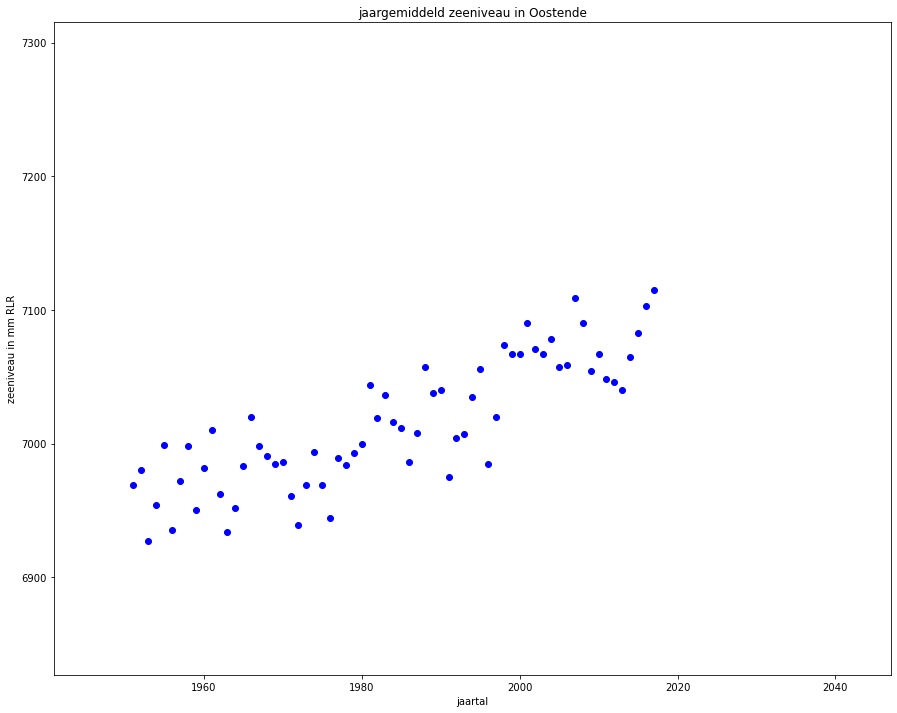

In [4]:
# voorbeeldscript
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+30)
plt.ylim(y.min()-100, y.max()+200)
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")

plt.show()

In [5]:
# voorbeeldscript
np.corrcoef(x, y)[0,1]

0.8380931683825255

Interpretatie: Men kan spreken van een sterke en positieve lineaire samenhang. 

<div>
    <font color=#690027 markdown="1"> 
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

In [6]:
# voorbeeldscript
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

def linreg(x, y):
    """Rechte best passend bij data x en y."""
    popt, pcov = curve_fit(rechte, x, y)
    a, b = popt                     # coëfficiënten
    print("y = ", a, " x +", b)
    return a, b

In [7]:
# voorbeeldscript
# trendlijn voor gegeven data zeeniveau
a, b = linreg(x, y)

y =  2.0562694548670146  x + 2935.5405060324283


In [8]:
# voorbeeldscript
# punten om trendlijn te tonen
x_regressielijn = np.arange(1951, 2070, 10)      # x-waarden kiezen tot verder in toekomst
y_regressielijn = rechte(x_regressielijn, a, b)

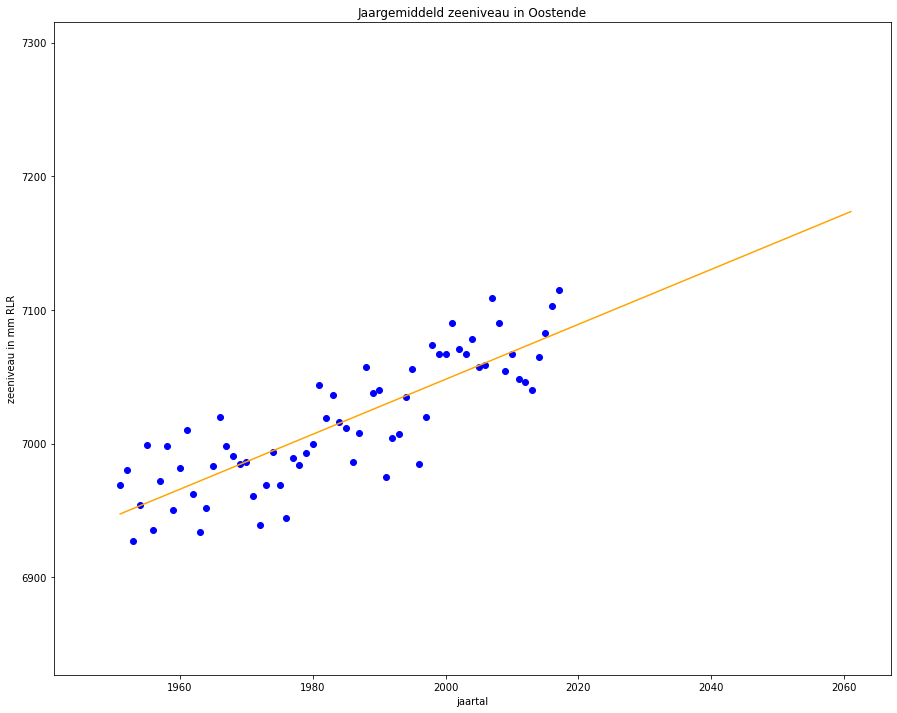

In [9]:
# voorbeeldscript
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+50)
plt.ylim(y.min()-100, y.max()+200)
plt.title("Jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")
plt.plot(x_regressielijn, y_regressielijn, color="orange")

plt.show()

<div>
    <font color=#690027 markdown="1"> 
        <h2>4. Stijging van het zeeniveau tussen 1951 en 2017</h2> 
    </font>
</div>

Op https://www.milieurapport.be te lezen: "Statistische analyse van de eigenlijke meetwaarden aan de Belgische kust laat zien dat het jaargemiddelde zeeniveau in 2017 significant hoger ligt dan bij het begin van de meetreeks enkele decennia geleden:
in Oostende steeg de trendlijn van het zeeniveau met 129 mm tussen 1951 en 2017". <br>
Controleer dit.

Het jaargemiddeld zeeniveau gemeten in 2018 en 2019 bedraagt resp. 7067 en 7129 mm RLR [4]. Vergelijk. 

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.1 De gemeten stijging</h3> 
    </font>
</div>

Berekening van de stijging volgens de metingen:

In [10]:
# Berekenen zeeniveaustijging in mm tussen 1951 en 2017
# y is nog steeds de NumPy array van de gemeten zeeniveaus
print(y)
print(len(y))
print(y[66] - y[0])

[6969 6980 6927 6954 6999 6935 6972 6998 6950 6982 7010 6962 6934 6952
 6983 7020 6998 6991 6985 6986 6961 6939 6969 6994 6969 6944 6989 6984
 6993 7000 7044 7019 7036 7016 7012 6986 7008 7057 7038 7040 6975 7004
 7007 7035 7056 6985 7020 7074 7067 7067 7090 7071 7067 7078 7057 7059
 7109 7090 7054 7067 7048 7046 7040 7065 7083 7103 7115]
67
146


Conclusie: De gemeten stijging is **146 mm**.

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.2 Stijging volgens de trendlijn</h3> 
    </font>
</div>

Berekening van de stijging volgens het wiskundig model:

In [11]:
x2_regressielijn = np.arange(1951, 2040, 1)    # stappen van 1 jaar

In [12]:
x2_regressielijn[0], x2_regressielijn[66] 

(1951, 2017)

In [13]:
y2_regressielijn = rechte(x2_regressielijn, a, b)
print(y2_regressielijn[66] - y2_regressielijn[0])

135.71378402122264


Conclusie: De stijging, berekend volgens de rechte, is ongeveer **13,6 cm**, en is van dezelfde grootteorde als de gemeten en de hierboven vermelde stijging.

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.3 2018 en 2019</h3> 
    </font>
</div>

Het jaargemiddeld zeeniveau gemeten in 2018 en 2019 bedraagt resp. 7067 en 7129 mm RLR. Hieronder wordt berekend wat de trendlijn voorspelt.

In [14]:
x2_regressielijn[67], x2_regressielijn[68]

(2018, 2019)

In [15]:
y2_regressielijn[67], y2_regressielijn[68]

(7085.092265954064, 7087.148535408931)

Conclusie: 
- De trendlijn voorspelt voor 2018 7085 mm RLR en voor 2019 7087 mm RLR.
- De trendlijn geeft een voorspelling hoger dan in werkelijkheid voor 2018 en een lager dan in werkelijkheid voor 2019. 

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.4 2030</h3> 
    </font>
</div>

In [16]:
np.where(x2_regressielijn == 2030)

(array([79], dtype=int64),)

In [17]:
x2_regressielijn[79]

2030

In [18]:
y2_regressielijn[79]

7109.767499412468

Conclusie: 
- De trendlijn voorspelt voor 2030 een jaargemiddeld zeeniveau van 7109 mm RLR. 

### Extra's - voer voor discussie

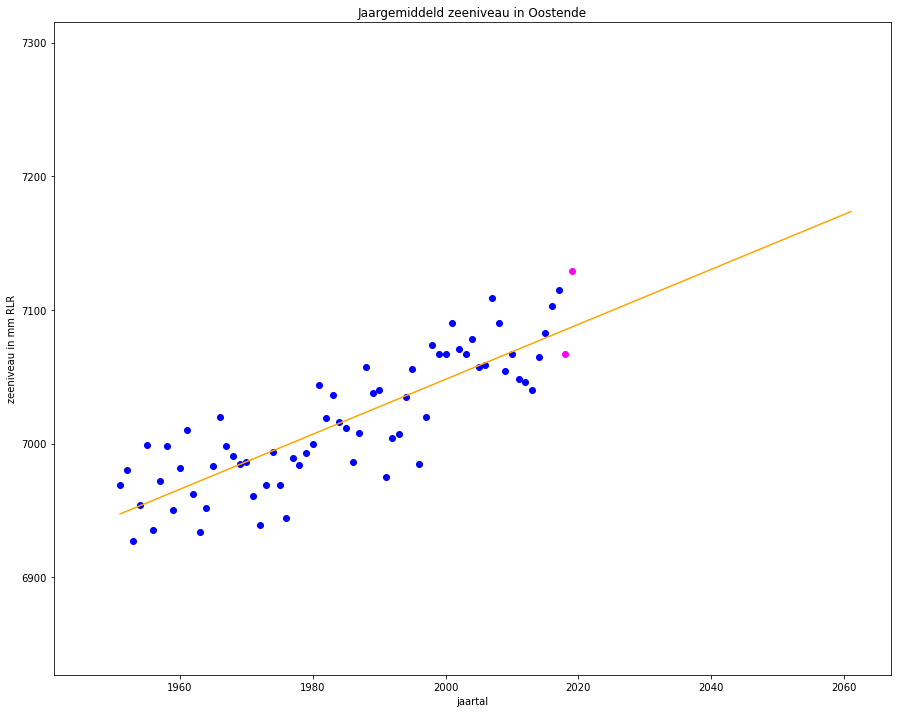

In [19]:
# voorbeeldscript
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+50)
plt.ylim(y.min()-100, y.max()+200)
plt.title("Jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")
plt.plot(x_regressielijn, y_regressielijn, color="orange")
plt.plot(2018, 7067, color="magenta", marker="o")
plt.scatter(2019, 7129, color="magenta", marker="o")

plt.show()

In [20]:
# opsplitsen in 2 overlappende periodes
np.where(x == 2000), len(x)

((array([49], dtype=int64),), 67)

In [21]:
x_periode1 = x[0: 50]
print(x_periode1)

[1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000]


In [22]:
x_periode2 = np.append(x[39:], [2018, 2019])
print(x_periode2)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [23]:
y_periode1 = y[0: 50]
y_periode2 = np.append(y[39:], [7067, 7129])

In [24]:
a1, b1 = linreg(x_periode1, y_periode1)
a2, b2 = linreg(x_periode2, y_periode2)

y =  1.7633133253318394  x + 3512.074525817895
y =  2.7234705228068896  x + 1599.7366703779453


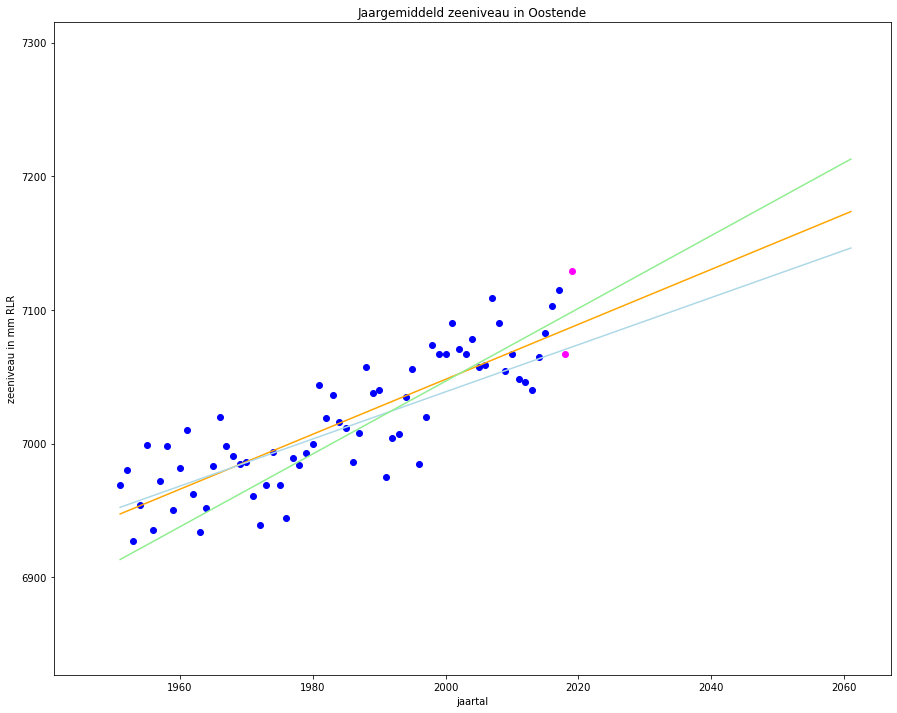

In [25]:
# voorbeeldscript
# punten om trendlijn te tonen
y_regressielijn_periode1 = rechte(x_regressielijn, a1, b1)
y_regressielijn_periode2 = rechte(x_regressielijn, a2, b2)

plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+50)
plt.ylim(y.min()-100, y.max()+200)
plt.title("Jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")
plt.plot(x_regressielijn, y_regressielijn, color="orange")
plt.plot(x_regressielijn, y_regressielijn_periode1, color="lightblue")
plt.plot(x_regressielijn, y_regressielijn_periode2, color="lightgreen")
plt.plot(2018, 7067, color="magenta", marker="o")
plt.scatter(2019, 7129, color="magenta", marker="o")

plt.show()

Conclusie: Het ziet ernaar uit dat de stijging nu sneller verloopt dan in de periode tot 2020. 

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Vlaamse Milieumaatschappij (2019). Klimaatverandering. Geraadpleegd op 21 januari 2020 via <br> &nbsp; &nbsp; &nbsp; &nbsp; https://www.milieurapport.be/milieuthemas/klimaatverandering<br>
[2] Frank De Boosere. (2010). Ten opzichte van welk nulpunt gebeuren de hoogtemetingen voor landkaarten? <br> &nbsp; &nbsp; &nbsp; &nbsp; Geraadpleegd op 21 januari 2020 via https://www.frankdeboosere.be/vragen/vraag72.php <br> 
[3] Vlaamse Milieumaatschappij (2019). Zeeniveau. Geraadpleegd op 21 januari 2020 via <br> &nbsp; &nbsp; &nbsp; &nbsp; https://www.milieurapport.be/milieuthemas/klimaatverandering/zeeklimaat/zeeniveau/zeeniveau<br>
[4] Vlaamse Milieumaatschappij (2021). Zeeniveau. Geraadpleegd op 12 november 2021 via <br> &nbsp; &nbsp; &nbsp; &nbsp;https://www.milieurapport.be/milieuthemas/klimaatverandering/zeeklimaat/zeeniveau

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.

<div>
    <h2>Met steun van</h2> 
</div>

<img src="images/kikssteun.png" alt="Banner" width="800"/>